# Prediction of Rental Bike Count Using Linear Regression,Decision Tree Regression,Ridge Regression and Random Forest Regression Techniques

# Code:

Importing the necessary libraries.

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [180]:
read_df = pd.read_csv(r'C:\Users\karth\Downloads\bike+sharing+dataset\hour.csv')
read_df.info()
read_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Data Preprocessing

In [169]:
read_df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
x=read_df.drop(['cnt'],axis=1)
Y=read_df['cnt']

Data scaling

In [170]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(x)

Splitting the Dataset into training and test data(80:20 split)

In [182]:
x_train,x_test,y_train,y_test = train_test_split(x_scale, Y, test_size = 0.2, random_state = 0)

print(x_train)

[[-1.3566343   0.99489192 -1.61043792 ... -1.18173227 -0.08930363
   0.88609866]
 [-1.3566343  -1.0051343   1.58846698 ... -1.00541086  0.11803159
  -0.21169121]
 [-1.3566343  -1.0051343  -1.02881885 ... -0.12380383  1.62121199
   1.13050609]
 ...
 [-1.3566343   0.99489192 -1.31962838 ... -1.53437508 -0.14113744
   1.37409609]
 [-0.45319913  0.99489192 -1.02881885 ... -0.30012523  0.74003727
   0.51989623]
 [-0.45319913 -1.0051343  -0.73800931 ...  0.84625487 -0.81497693
   1.37409609]]


Dataset Analysis - Feature extraction

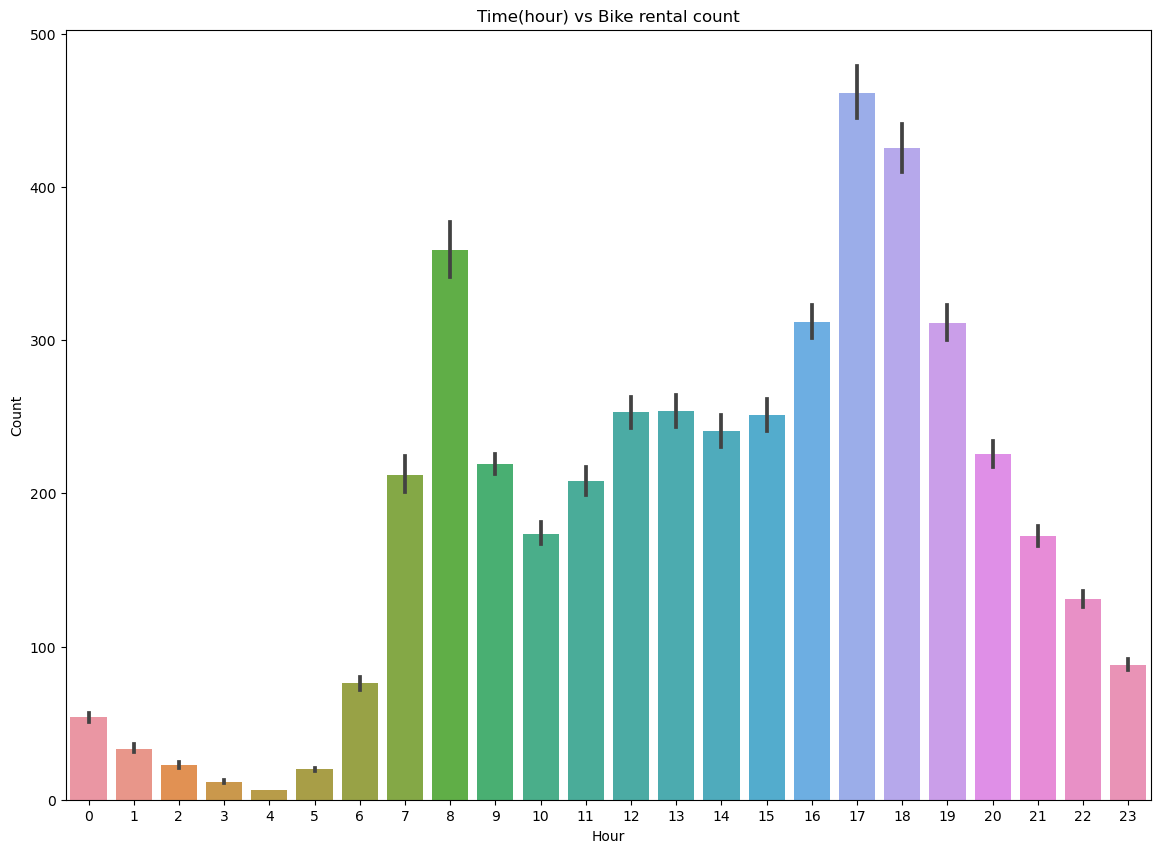

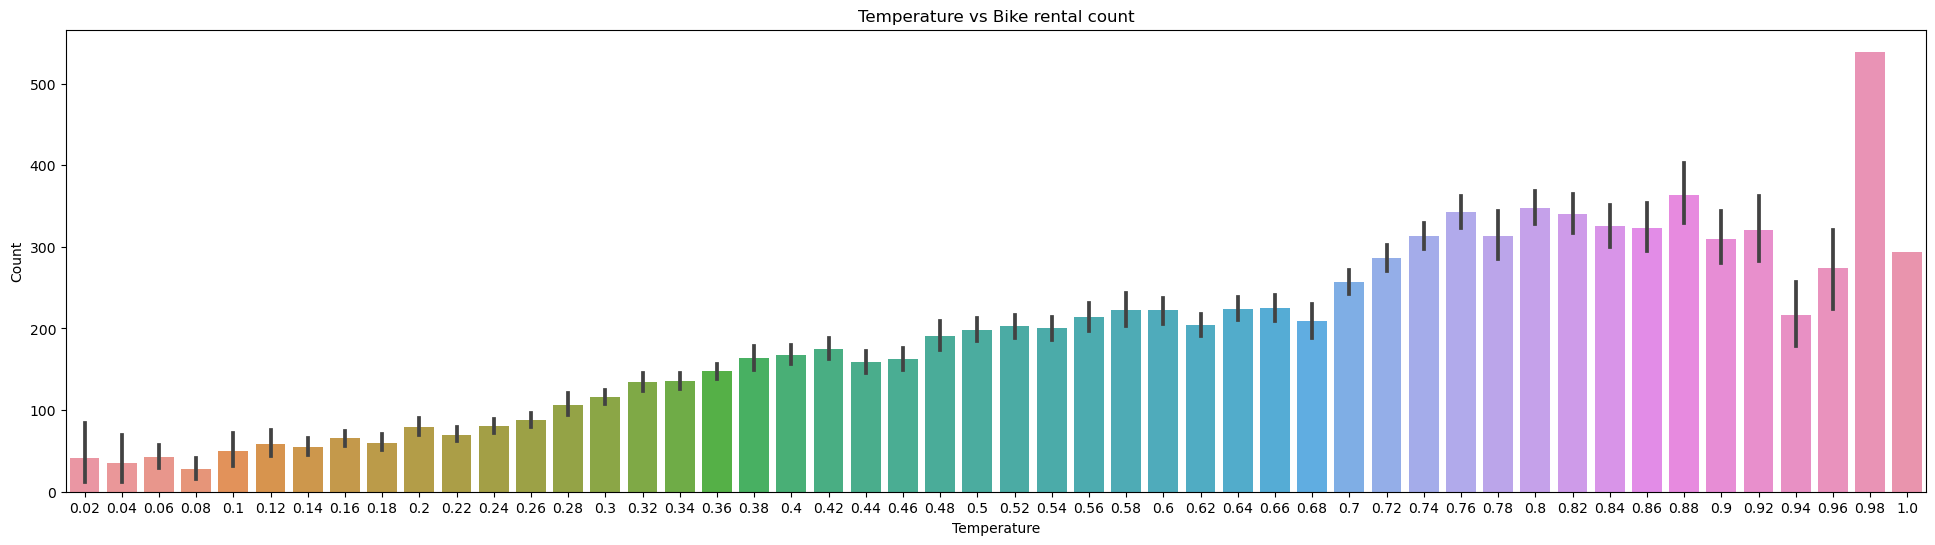

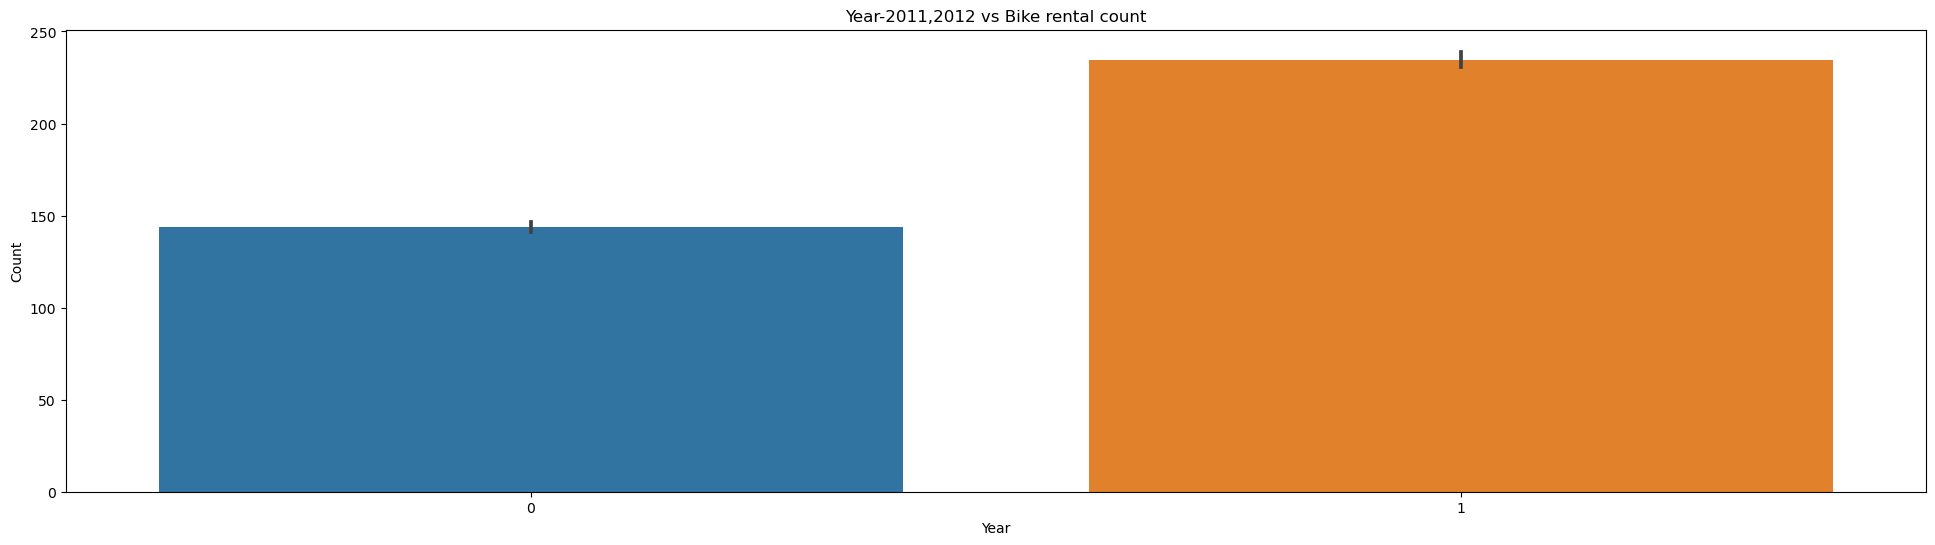

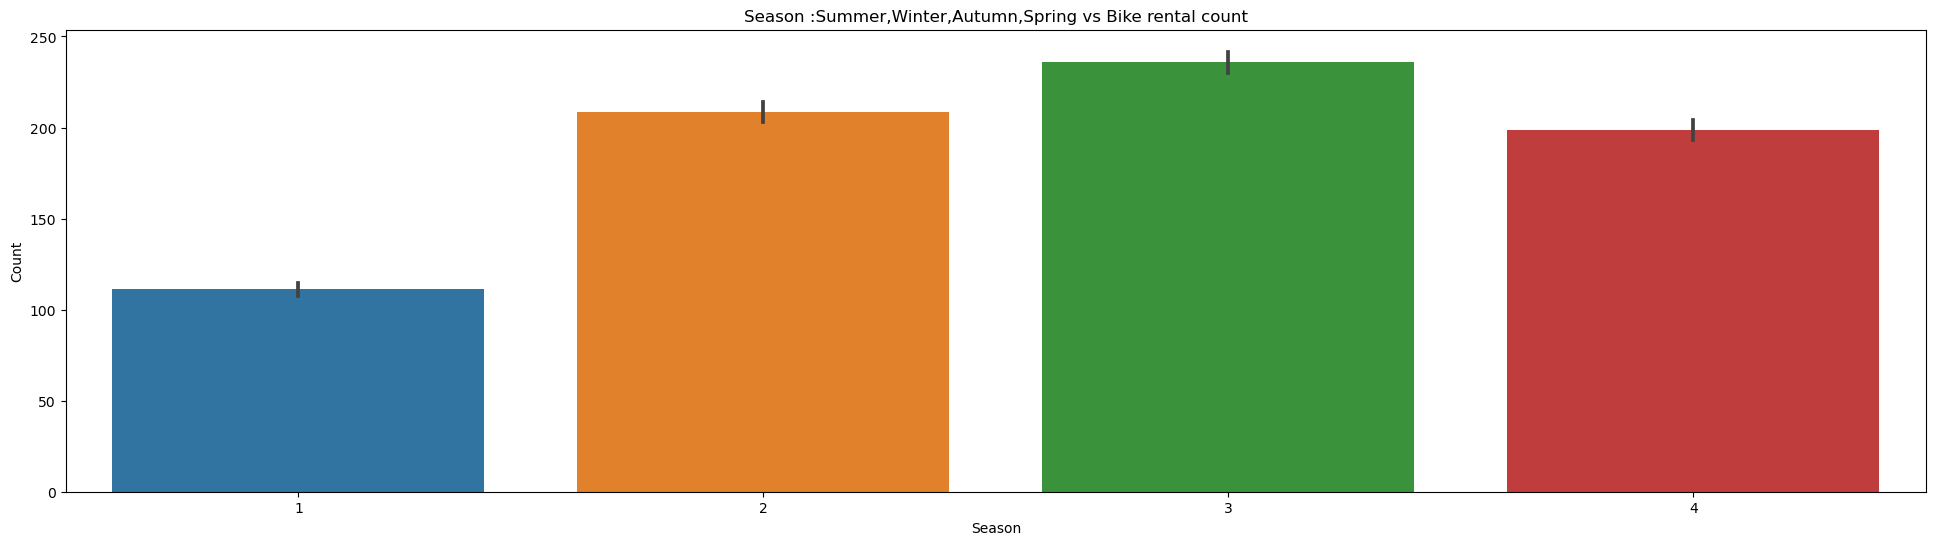

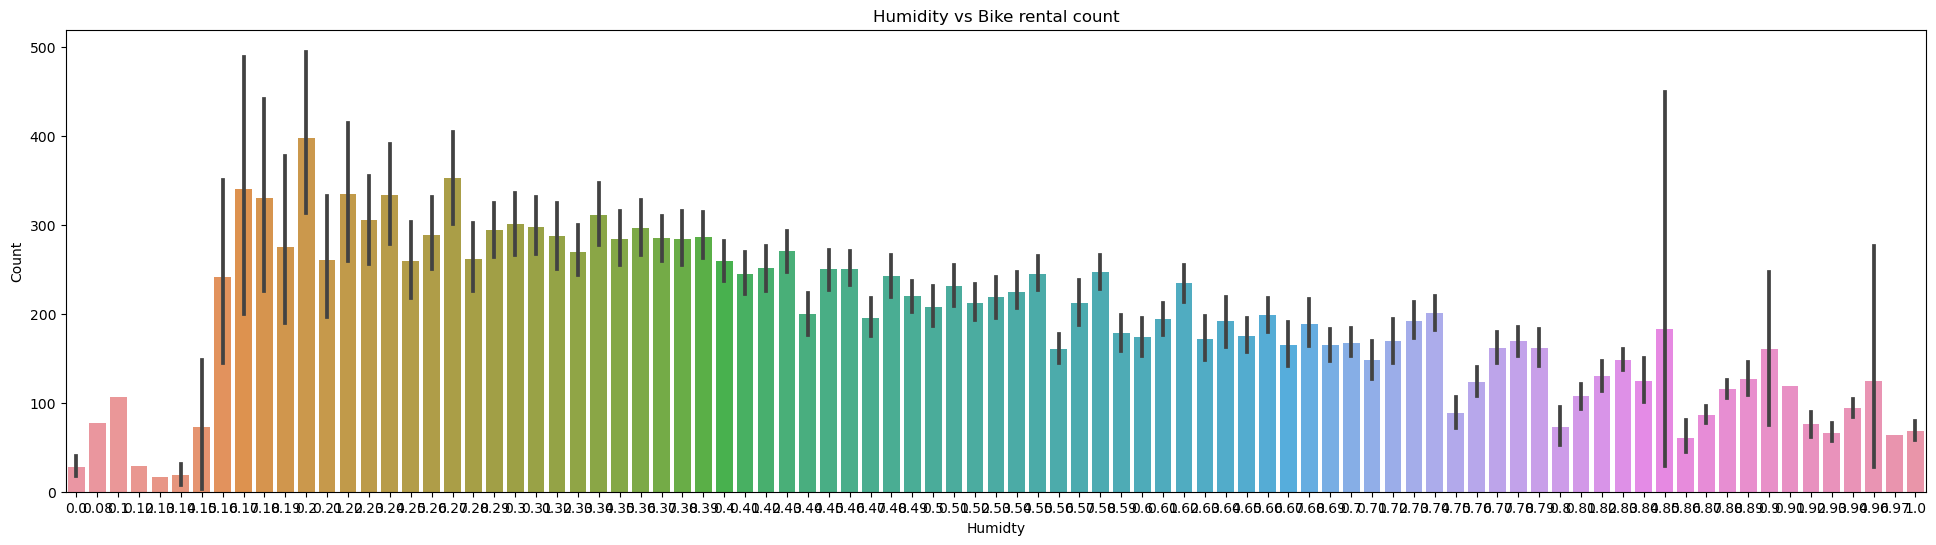

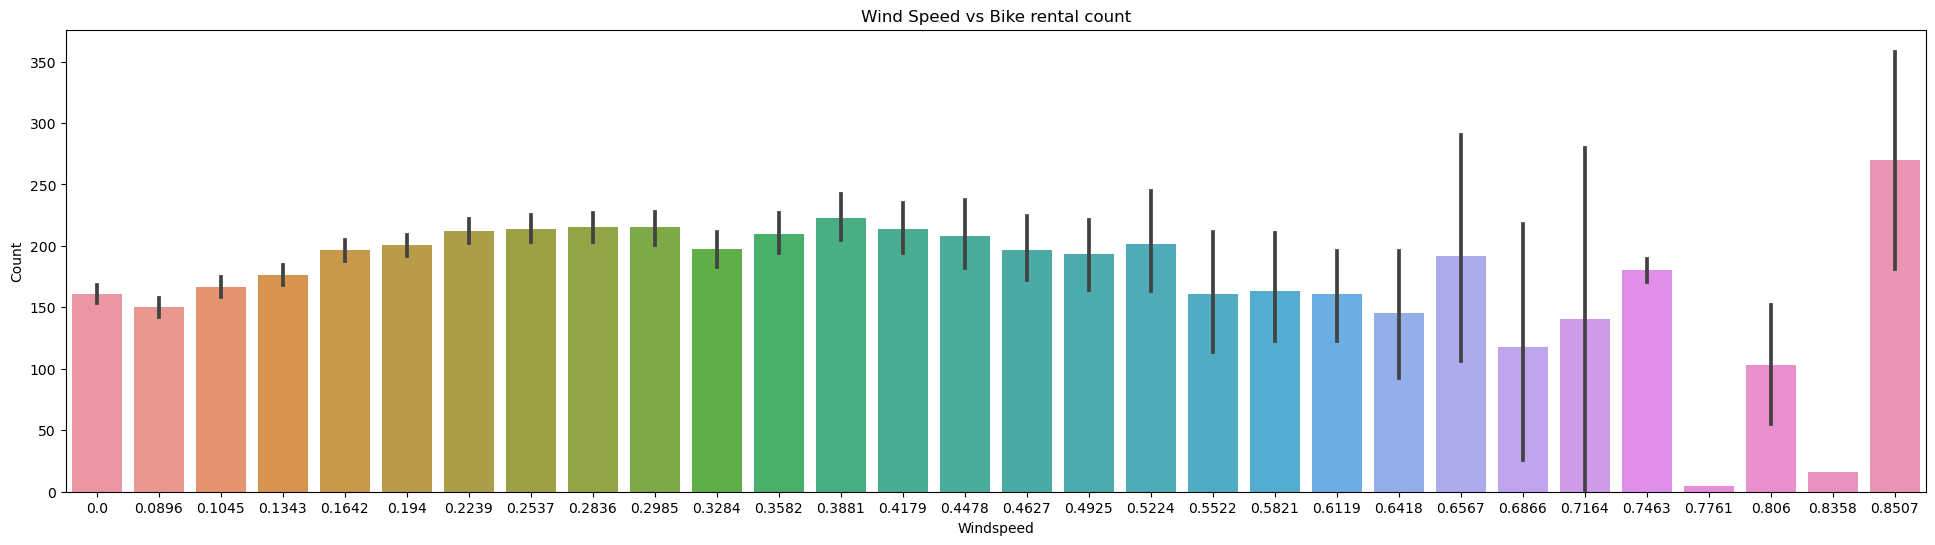

In [172]:
#Time(hour) vs Bike rental count
plt.figure(figsize=(14, 10))
sns.barplot(x='hr',y='cnt',data=read_df)
plt.title('Time(hour) vs Bike rental count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#Temperature vs Bike rental count
plt.figure(figsize=(24, 6))
sns.barplot(x='temp',y='cnt',data=read_df)
plt.title('Temperature vs Bike rental count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

#Year(2011,2012) vs Bike rental count
plt.figure(figsize=(24, 6))
sns.barplot(x='yr',y='cnt',data=read_df)
plt.title('Year-2011,2012 vs Bike rental count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#Seasons vs Bike rental count
plt.figure(figsize=(24, 6))
sns.barplot(x='season',y='cnt',data=read_df)
plt.title('Season :Summer,Winter,Autumn,Spring vs Bike rental count')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

#Humidity vs Bike rental count
plt.figure(figsize=(24, 6))
sns.barplot(x='hum',y='cnt',data=read_df)
plt.title('Humidity vs Bike rental count')
plt.xlabel('Humidty')
plt.ylabel('Count')
plt.show()

#Wind Speed vs Bike rental count
plt.figure(figsize=(24, 6))
sns.barplot(x='windspeed',y='cnt',data=read_df)
plt.title('Wind Speed vs Bike rental count')
plt.xlabel('Windspeed')
plt.ylabel('Count')
plt.show()

Regression Models 

1.Linear Regression model

In [173]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)
LR_predict = LR_model.predict(x_test)

r1 = r2_score(y_test, LR_predict)
m1=mean_squared_error(y_test, LR_predict)

print("-------Linear Regression Model--------\n")
print("1.R2 score:", r1)
print("2.Mean squared error (MSE):",m1 )

print("3.Coefficients:", LR_model.coef_)
print("4.Inercept:", LR_model.intercept_)

#Printing Test target Data and Predicted target data
df_results1 = pd.DataFrame({'Testing Data':y_test,'Predicted Data':LR_predict})
print("\n",df_results1)

-------Linear Regression Model--------

1.R2 score: 0.4028787536036338
2.Mean squared error (MSE): 19925.402129180035
3.Coefficients: [ 22.33894249  39.812909     0.78286676  53.29997228  -4.05588596
   4.16772054   2.0026293   -3.49046658  15.39194464  39.0428556
 -36.64534641   5.75849617]
4.Inercept: 189.0883137206798

        Testing Data  Predicted Data
3439              7       65.440955
6542              5       56.519286
15470           743      330.457435
9851            208      125.280836
12640           333      366.066127
...             ...             ...
15249           163      243.454096
12869           184      311.667927
5653             34       83.111339
17313             7       67.907738
16058           371      275.637807

[3476 rows x 2 columns]


2.Ridge regression model

In [174]:
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
ridge_predict = ridge_model.predict(x_test)

r2 = r2_score(y_test, ridge_predict)
m2=mean_squared_error(y_test, ridge_predict)


print("-------Ridge regression Model--------\n")
print("1.R2 score:", r2)
print("2.Mean squared error (MSE):",m2)
print("3.Coefficients:", ridge_model.coef_)
print("4.Inercept:", ridge_model.intercept_)

#Printing Test target Data and Predicted target data
df_results2 = pd.DataFrame({'Testing Data':y_test,'Predicted Data':ridge_predict})
print("\n",df_results2)

-------Ridge regression Model--------

1.R2 score: 0.4028769431701156
2.Mean squared error (MSE): 19925.4625417279
3.Coefficients: [ 22.33433527  39.81014333   0.78642123  53.29708231  -4.05607158
   4.16690921   2.0024004   -3.49170668  15.46457427  38.9694561
 -36.64258855   5.75624582]
4.Inercept: 189.08835553215815

        Testing Data  Predicted Data
3439              7       65.450463
6542              5       56.524458
15470           743      330.442642
9851            208      125.292349
12640           333      366.060021
...             ...             ...
15249           163      243.458645
12869           184      311.668834
5653             34       83.120207
17313             7       67.930189
16058           371      275.635825

[3476 rows x 2 columns]


3.Decision Tree model

In [175]:
DT_model = DecisionTreeRegressor()
DT_model.fit(x_train, y_train)
DT_predict = DT_model.predict(x_test)

r3 = r2_score(y_test, DT_predict)
m3=mean_squared_error(y_test, DT_predict)

print("-------Decision Tree Regrssion Model--------\n")
print("1.R2 score:", r3)
print("2.Mean squared error (MSE):", m3)

#Printing Test target Data and Predicted target data
df_results3 = pd.DataFrame({'Testing Data':y_test,'Predicted Data':DT_predict})
print("\n",df_results3)

-------Decision Tree Regrssion Model--------

1.R2 score: 0.8923235429320482
2.Mean squared error (MSE): 3593.067102991945

        Testing Data  Predicted Data
3439              7             4.0
6542              5             4.0
15470           743           368.0
9851            208           109.0
12640           333           339.0
...             ...             ...
15249           163           154.0
12869           184           147.0
5653             34            30.0
17313             7             9.0
16058           371           344.0

[3476 rows x 2 columns]


4.Random Forest Regression model

In [176]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(x_train, y_train)
rf_predict = rf_model.predict(x_test)

r4 = r2_score(y_test, rf_predict)
m4=mean_squared_error(y_test, rf_predict)

print("-------Random forest Model--------\n")
print("1.R2 score:", r4)
print("2.Mean squared error (MSE):", m4)

#Printing Test target Data and Predicted target data
df_results4= pd.DataFrame({'Testing Data':y_test,'Predicted Data':rf_predict})
print("\n",df_results4)

-------Random forest Model--------

1.R2 score: 0.9409462233845566
2.Mean squared error (MSE): 1970.5717279542419

        Testing Data  Predicted Data
3439              7            8.19
6542              5            5.03
15470           743          393.76
9851            208          183.25
12640           333          307.66
...             ...             ...
15249           163          104.14
12869           184          170.87
5653             34           34.74
17313             7            9.78
16058           371          373.81

[3476 rows x 2 columns]


Plotting feature importances to target variable 'cnt' for Random Forest Regression

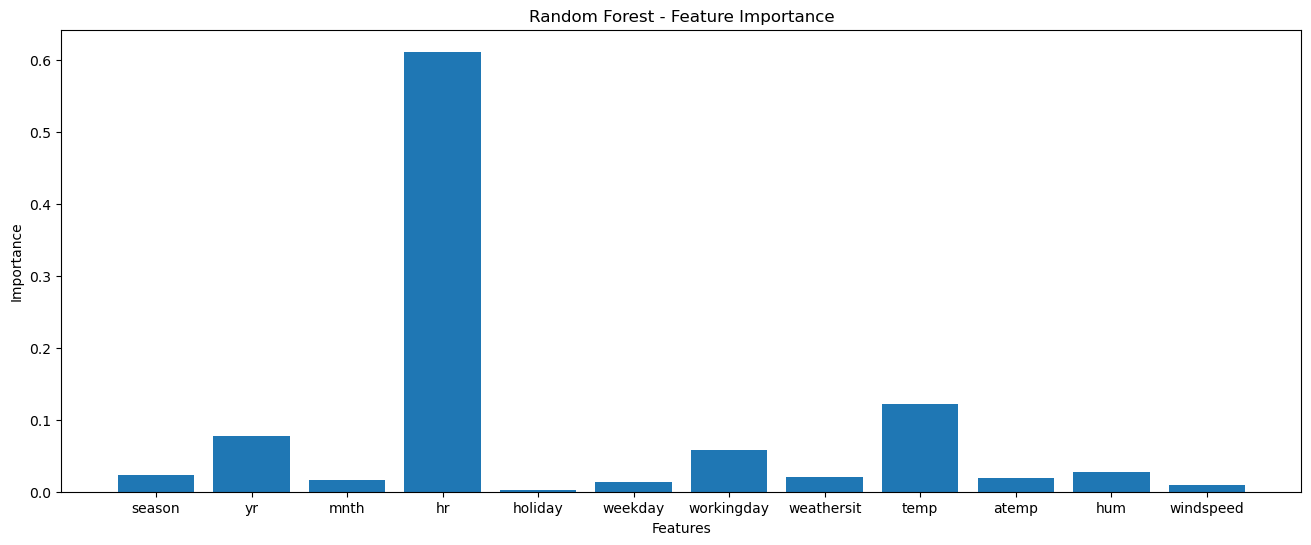

In [177]:
importances = rf_model.feature_importances_
features = x.columns

plt.figure(figsize=(16, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest - Feature Importance')

plt.show()


In [178]:
print("Model                     R Score  MSE")
print("-----------------------------------------------")
print("Linear Regression         {:.2f}\t{:.2f}".format(r1, m1))
print("Ridge Regression          {:.2f}\t{:.2f}".format(r2, m2))
print("Decision Tree Regression  {:.2f}\t{:.2f}".format(r3, m3))
print("Random Forest Regression  {:.2f}\t{:.2f}".format(r4, m4))

Model                     R Score  MSE
-----------------------------------------------
Linear Regression         0.40	19925.40
Ridge Regression          0.40	19925.46
Decision Tree Regression  0.89	3593.07
Random Forest Regression  0.94	1970.57
